In [1]:
import pandas as pd
import json
import poloniex
import utils
import numpy as np
from collections import deque
from SimulatorRig import SimRig
import matplotlib.pyplot as plt

In [2]:
% matplotlib inline

In [3]:
configs = utils.loadConfigs()

In [4]:
sim = SimRig("USDT_BTC", 1800, configs)

In [5]:
sim.setup('USDT_BTC_november_1800.json')

In [6]:
def momentum(crypto, alpha):
    vector = 0
    prev = crypto[0]
    for i in range(1, len(crypto)-1):
        curr = crypto[i]
        new_vec = (curr['momentum'] - prev['momentum'])/(2)
        vector = new_vec + alpha * vector
        prev = curr
    return vector     

In [7]:
def moving_avg(crypto):
    dat = pd.DataFrame(list(crypto))
    lma = np.mean(dat['weightedAverage'])
    sma = np.mean(dat[int(len(dat)*2/3):]['weightedAverage'])
    return sma - lma

In [8]:
sim.analyzeWith(moving_avg)

In [9]:
sim.getHist()

,close,date,high,low,open,quoteVolume,volume,weightedAverage,momentum
0,6410.000000,2017-11-01 00:00:00,6458.168550,6376.931349,6455.000000,98.592544,6.322029e+05,6412.279121,0.000000
1,6376.180684,2017-11-01 00:30:00,6414.001592,6370.000000,6408.000000,87.710778,5.606600e+05,6392.145273,0.000000
2,6400.000000,2017-11-01 01:00:00,6429.800000,6376.180684,6389.000000,55.773997,3.576560e+05,6412.594348,0.000000
3,6411.618412,2017-11-01 01:30:00,6415.542063,6399.644083,6415.494984,23.184116,1.485445e+05,6407.168113,0.000000
4,6406.000000,2017-11-01 02:00:00,6415.000000,6392.254840,6407.000000,47.260834,3.025194e+05,6401.060154,0.000000
5,6419.902706,2017-11-01 02:30:00,6425.000000,6408.161147,6415.000000,34.210961,2.195140e+05,6416.480917,0.000000
6,6425.666489,2017-11-01 03:00:00,6449.999777,6419.902706,6421.000000,42.004101,2.703288e+05,6435.770779,0.000000
7,6405.520609,2017-11-01 03:30:00,6440.490000,6404.432203,6421.700000,50.663096,3.256177e+05,6427.118736,0.000000
8,6366.014489,2017-11-01 04:00:00,6420.807868,6359.732654,6405.520609,90.596149,5.788734e+05,6389.602375,0.000000
9,6362.000000,2017-11-01 04:30:00,6384.613338,6351.000000,6369.000000,55.954473,3.560790e+05,6363.726445,0.000000


In [10]:
btc_dat = sim.getHist()[:96*3]

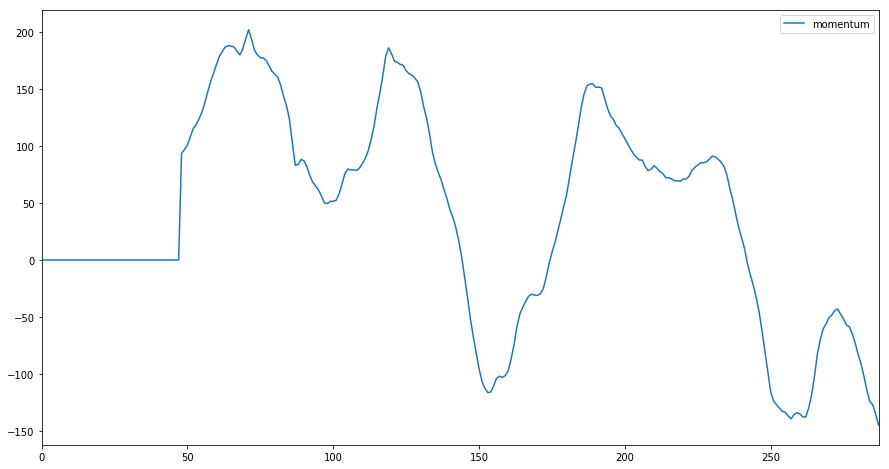

In [11]:
btc_dat.plot(x=btc_dat.index, y='momentum', figsize=(15,8))

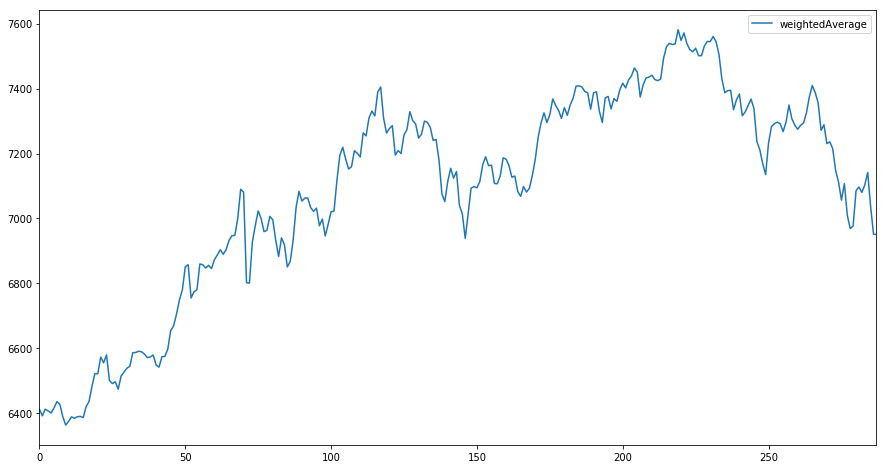

In [12]:
btc_dat.plot(x=btc_dat.index, y='weightedAverage', figsize=(15,8))

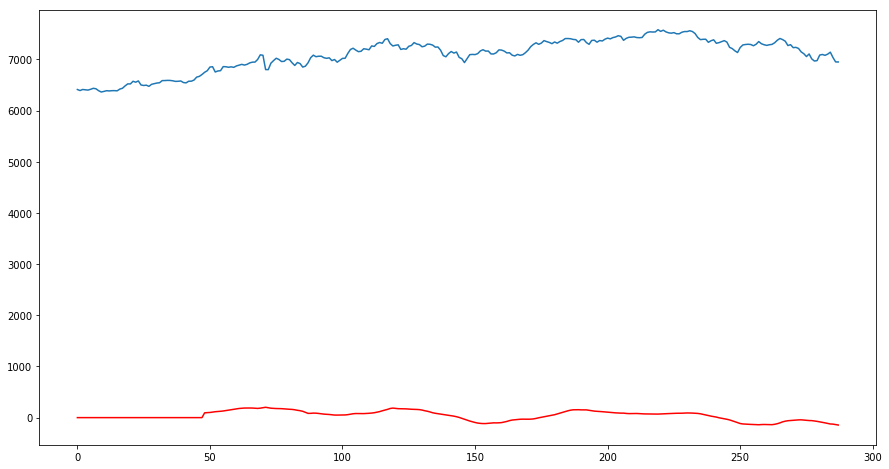

In [13]:
plt.figure(figsize=(15,8))
plt.plot(btc_dat.index, btc_dat['weightedAverage'])
plt.plot(btc_dat.index, btc_dat['momentum'], color='r')
plt.show()

In [14]:
sim.getHistIndex()

1441